In [12]:
gc.collect()

14585

In [13]:
torch.cuda.empty_cache()

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
import torch
torch.cuda.empty_cache()

In [2]:
bs = 12

In [3]:
path = untar_data(URLs.PETS)/'images'

In [15]:
path

WindowsPath('C:/Users/bokhy/.fastai/data/oxford-iiit-pet/images')

In [4]:
# Set transformations you want to pass 
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)

In [5]:
src = ImageList.from_folder(path).split_by_rand_pct(0.2, seed=623)

In [6]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.label_from_re(r'([^/]+)_\d+.jpg$')
           .transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

In [7]:
data = get_data(224, bs, 'zeros')

In [8]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

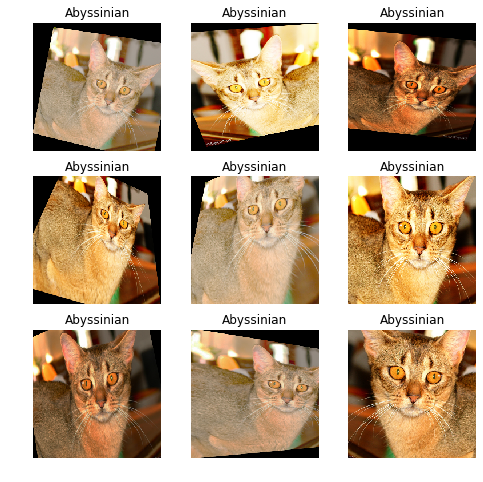

In [9]:
plot_multi(_plot, 3, 3, figsize=(8,8))

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, bn_final=True)

In [11]:
# Fit a bit
learn.fit_one_cycle(3, slice(1e-2), pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,1.636943,0.472740,0.106225,06:39
1,1.253622,0.323178,0.094046,05:02
2,0.963253,0.262955,0.071042,05:10


In [14]:
# unfreeze and fit again
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-3), pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,0.914319,0.253832,0.072395,07:14
1,0.861702,0.241456,0.064953,07:39
2,0.785947,0.236141,0.065629,07:24


In [16]:
learn.save('cnn_data_augmentation',return_path=True)

WindowsPath('C:/Users/bokhy/.fastai/data/oxford-iiit-pet/images/models/cnn_data_augmentation.pth')

In [17]:
learn.export('cnn_data_augmentation.pkl')